In [2]:
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re

In [36]:
scores_file = "data/scores.csv"  # target
scores_df = pd.read_csv(scores_file)

# Reading in data
prosodic_file = "data/prosodic_features.csv"
prosodic_data = pd.read_csv(prosodic_file)
# Add a column that corresponds to participant for easy splitting for prosodic data
prosodic_data['Participant'] = prosodic_data['participant&question'].str.extract(r'^(PP?\d+)')
prosodic_data['Participant'] = prosodic_data['Participant'].str.lower()
#normalizing the prosodic scores for all the participants
merged_df = prosodic_data.merge(scores_df[['Participant', 'Overall', 'Excited']], on='Participant', how='left')
merged_df.to_csv('data/clean_prosodic_features.csv', index=False)  
print(merged_df.head())
# create the average prosodic scores column as well
# later create the feature set 1, feature set 2 average prosodic score column as well

  participant&question   duration    energy  min_pitch   max_pitch  \
0                 P1Q1  51.952125  0.015331  75.232657  396.635613   
1                 P1Q2  38.677312  0.015185  75.165527  397.613041   
2                 P1Q3  43.593896  0.014680  71.034761  395.930688   
3                 P1Q4  23.435813  0.008920  74.938673  248.733738   
4                 P1Q5  13.274833  0.003432  93.949854  263.669188   

   mean_pitch   pitch_sd   pitch_abs  pitch_quant  pitchUvsVRatio  ...  \
0  127.989222  27.821528  217.628692   119.690367        0.773830  ...   
1  131.067490  26.452853  195.852246   124.820583        0.717333  ...   
2  127.739086  26.006330  189.441737   120.457848        1.068376  ...   
3  129.563914  19.334327  103.024640   124.473851        1.121487  ...   
4  130.178482  26.595483  174.934601   120.272480        1.078493  ...   

   numPause  maxDurPause  avgDurPause  TotDurPause:3  iInterval  MaxRising:3  \
0        55     1.290667        0.494         27.176  

In [41]:
# print(prosodic_data.columns.tolist())
print(merged_df.columns.tolist())
print(len(merged_df.columns.tolist()))

['duration', 'energy', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause', 'avgDurPause', 'TotDurPause:3', 'iInterval', 'MaxRising:3', 'MaxFalling:3', 'Overall', 'Excited', 'MinMax_Average_all', 'Z-Score_Average_all']
39


   MinMax_Average_all  Z-Score_Average_all
0            0.322197            -0.044607
1            0.316935            -0.076907
2            0.329109             0.013589
3            0.208050            -0.608249
4            0.228377            -0.460500
    duration    energy  min_pitch   max_pitch  mean_pitch   pitch_sd  \
0  51.952125  0.015331  75.232657  396.635613  127.989222  27.821528   
1  38.677312  0.015185  75.165527  397.613041  131.067490  26.452853   
2  43.593896  0.014680  71.034761  395.930688  127.739086  26.006330   
3  23.435813  0.008920  74.938673  248.733738  129.563914  19.334327   
4  13.274833  0.003432  93.949854  263.669188  130.178482  26.595483   

    pitch_abs  pitch_quant  pitchUvsVRatio  diffPitchMaxMin  ...  maxDurPause  \
0  217.628692   119.690367        0.773830       321.402957  ...     1.290667   
1  195.852246   124.820583        0.717333       322.447514  ...     1.866667   
2  189.441737   120.457848        1.068376       324.895927  ...  

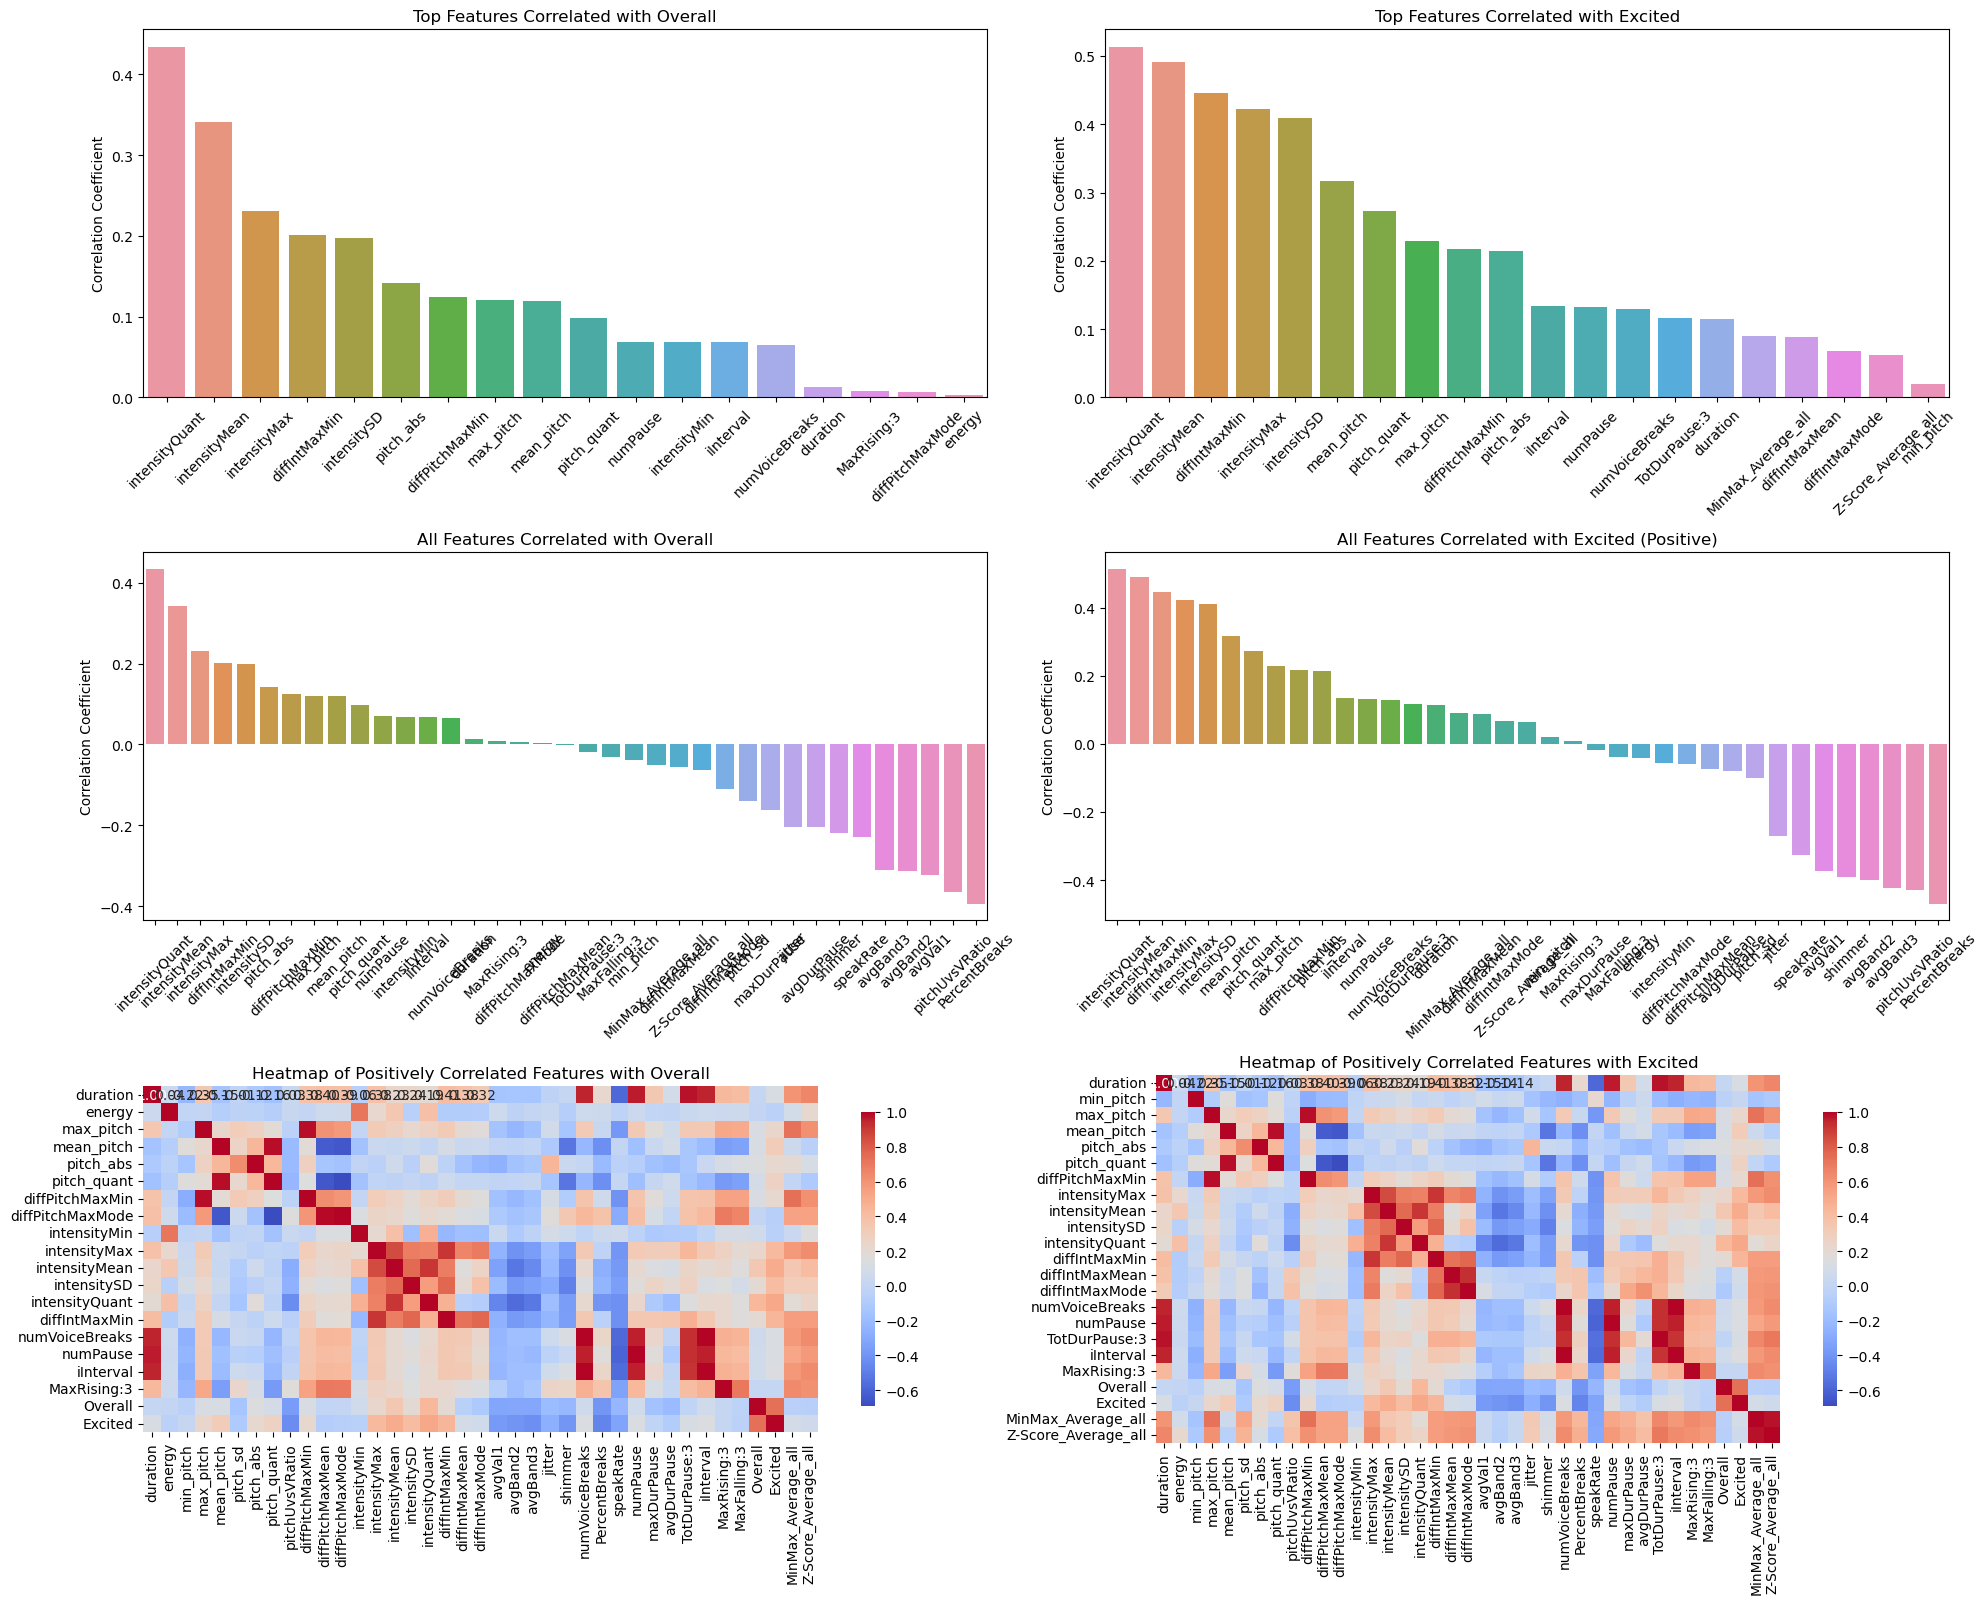

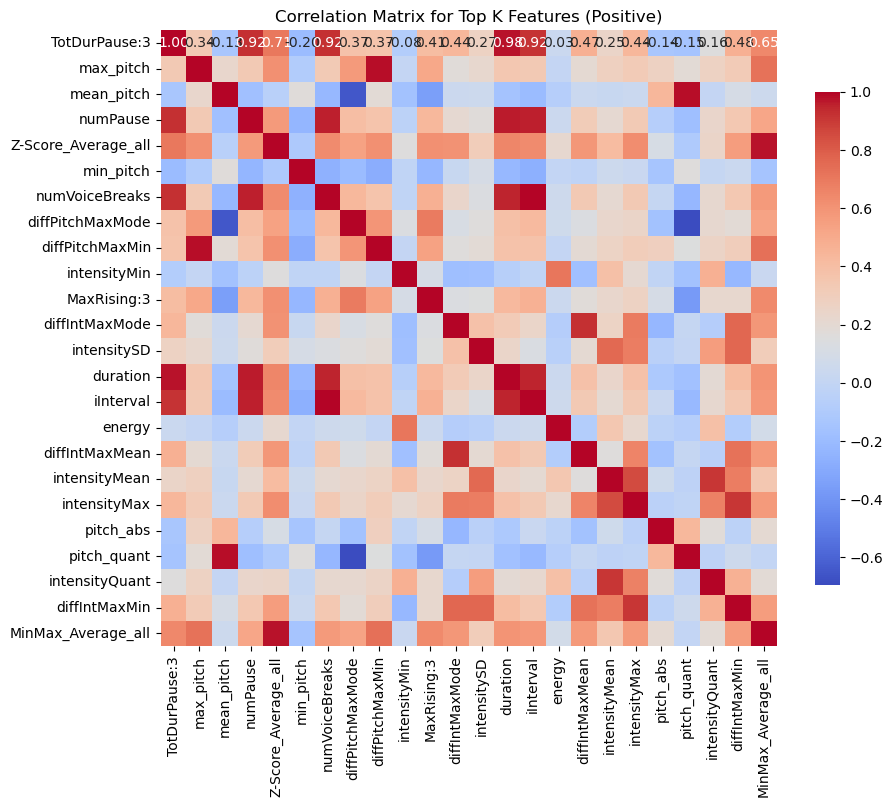

In [43]:
# Step 1: Calculate the Pearson correlation matrix
numeric_columns_all = ['duration', 'energy', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause', 'avgDurPause', 'TotDurPause:3', 'iInterval', 'MaxRising:3', 'MaxFalling:3','Overall', 'Excited']
numeric_columns_normalize = ['duration', 'energy', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgBand2', 'avgBand3', 'jitter', 'shimmer', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause', 'avgDurPause', 'TotDurPause:3', 'iInterval', 'MaxRising:3', 'MaxFalling:3']
merged_df = merged_df.drop(columns=['participant&question',"Participant"], errors='ignore')

# Print the number of NaN values before conversion
# print("NaN values before conversion:", merged_df[numeric_columns_normalize].isna().sum()) # none is the answer when run
# Step 2: Convert columns to numeric, forcing errors to NaN
merged_df[numeric_columns_normalize] = merged_df[numeric_columns_normalize].apply(pd.to_numeric, errors='coerce')

correlation_matrix = merged_df.corr()
# Step 2: Get the correlation of features with 'Overall' and 'Excited'
overall_corr = correlation_matrix['Overall'].drop(['Overall','Excited']).sort_values(ascending=False)
excited_corr = correlation_matrix['Excited'].drop(['Overall','Excited']).sort_values(ascending=False)

# Filter to show only positively correlated features
overall_corr_positive = overall_corr[overall_corr > 0]
excited_corr_positive = excited_corr[excited_corr > 0]

# Step 4: Select top k features (e.g., top 10)
top_k = 20
top_features_overall = overall_corr.head(top_k)
top_features_excited = excited_corr.head(top_k)
top_features_overall = overall_corr_positive.head(top_k)
top_features_excited = excited_corr_positive.head(top_k)

# Get the column names of top_k features
top_k_features = top_features_overall.index.tolist() + top_features_excited.index.tolist()
top_k_features = list(set(top_k_features))  # Remove duplicates

# Create the correlation matrix for the top_k features
top_k_correlation_matrix = merged_df[top_k_features].corr()

# Step 3: Calculate Min-Max normalization
min_max_normalized = (merged_df[numeric_columns_normalize] - merged_df[numeric_columns_normalize].min()) / (merged_df[numeric_columns_normalize].max() - merged_df[numeric_columns_normalize].min())
# Step 4: Calculate Z-score normalization
mean = merged_df[numeric_columns_normalize].mean()
std_dev = merged_df[numeric_columns_normalize].std()
z_score_normalized = (merged_df[numeric_columns_normalize] - mean) / std_dev

# Step 5: Calculate average scores for each row
merged_df['MinMax_Average_all'] = min_max_normalized.mean(axis=1)
merged_df['Z-Score_Average_all'] = z_score_normalized.mean(axis=1)
# Print the average score columns based on the normalization
print(merged_df[['MinMax_Average_all', 'Z-Score_Average_all']].head())
merged_df.to_csv('data/clean_prosodic_features_added_avgscores.csv', index=False)  
print(merged_df.head())
# find MinMax average and Z-score average for top m features only

# Step 5: Plot the output
plt.figure(figsize=(20, 16))

# Plot for Overall - Top Features
plt.subplot(3, 2, 1)
sns.barplot(x=top_features_overall.index, y=top_features_overall.values)
plt.title('Top Features Correlated with Overall')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.gca().set_aspect('auto', adjustable='box')

# Plot for Excited - Top Features
plt.subplot(3, 2, 2)
sns.barplot(x=top_features_excited.index, y=top_features_excited.values)
plt.title('Top Features Correlated with Excited')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.gca().set_aspect('auto', adjustable='box')

# Plot for Overall - All Features
plt.subplot(3, 2, 3)
sns.barplot(x=overall_corr.index, y=overall_corr.values)
plt.title('All Features Correlated with Overall')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.gca().set_aspect('auto', adjustable='box')

# Plot for Excited - All Features
plt.subplot(3, 2, 4)
sns.barplot(x=excited_corr.index, y=excited_corr.values)
plt.title('All Features Correlated with Excited (Positive)')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.gca().set_aspect('auto', adjustable='box')

# Additional plots for overall and excited correlations
plt.subplot(3, 2, 5)
sns.heatmap(correlation_matrix[correlation_matrix['Overall'] > 0].loc[correlation_matrix['Overall'] > 0], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Positively Correlated Features with Overall')

plt.subplot(3, 2, 6)
sns.heatmap(correlation_matrix[correlation_matrix['Excited'] > 0].loc[correlation_matrix['Excited'] > 0], annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Positively Correlated Features with Excited')

plt.tight_layout()
plt.show()

# Plot the correlation matrix for top_k features
plt.figure(figsize=(10, 8))
sns.heatmap(top_k_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Top K Features (Positive)')
plt.show()

Select two sets of top m features from ~37 features for multi-modal ML

In [ ]:
#write the code to select two features sets and drop other columns 